In [1]:
import cv2 as cv
import pandas as pd
import numpy as np
import os as os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping



import datetime



In [2]:
categories=['angry','fearful','happy','neutral','sad','surprised']

In [12]:
training_data=[]

DataDir='new\\train'
def data_load():
    for category in categories:
        path = os.path.join(DataDir, category)
        #path='new\\train\\angry'
        class_num=categories.index(category)
        for img in os.listdir(path):
            img_array=cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
            new_array=cv.resize(img_array,(48,48))
            training_data.append([new_array,class_num])
    x=[]
    y=[]
    for features, label in training_data:
        x.append(features)
        y.append(label)

    x=np.array(x).reshape(-1,48,48,1)
    y=np.array(y)
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)

    return x_train,x_test,y_train,y_test

In [13]:
x_train,x_test,y_train,y_test=data_load()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'new\\train\\angry'

In [9]:
x_train.shape

NameError: name 'x_train' is not defined

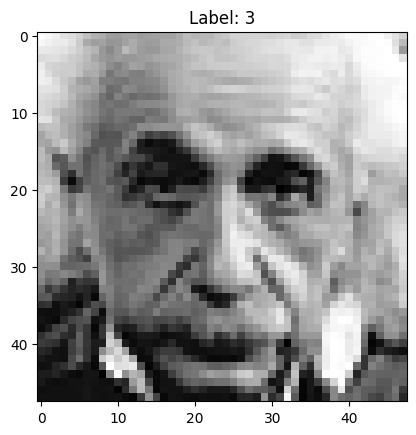

In [ ]:
import matplotlib.pyplot as plt

# Display the first image and its corresponding label
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [ ]:
#scale
x_train,x_test=x_train/255,x_test/255

In [ ]:
# # T1
# model = models.Sequential([
#     layers.Conv2D(32, (2,2), activation='relu', input_shape=(48,48,1)),
#     layers.BatchNormalization(),

#     layers.Conv2D(32, (2,2), activation='relu', padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2,2)),

#     layers.Conv2D(64, (2,2), activation='relu',padding='same'),
#     layers.BatchNormalization(),

#     layers.Conv2D(64, (2,2), activation='relu',padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2,2)),

#     layers.Conv2D(128, (2,2), activation='relu',padding='same'),
#     layers.BatchNormalization(),

#     layers.Conv2D(128, (2,2), activation='relu',padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2,2)),

#     layers.Flatten(),

#     layers.Dropout(0.25),

#     layers.Dense(128, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.25),

#     layers.Dense(128, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.25),

#     layers.Dense(512, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.25),


#     layers.Dense(128, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.25),

#     layers.Dense(128, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.25),

#     layers.Dense(6, activation='softmax')
# ])

In [ ]:
# T4
model = models.Sequential([
    layers.Conv2D(64, (2,2), activation='relu', input_shape=(48,48,1)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(128, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(128, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(128, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(256, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(512, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(512, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(512, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(512, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),

    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Dense(6, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 47, 47, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 47, 47, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 23, 23, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 23, 23, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 23, 23, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 23, 23, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 11, 11, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 11, 11, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 11, 11, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 256)      │             

 Total params: 6,433,670 (24.54 MB)

 Trainable params: 6,425,222 (24.51 MB)

 Non-trainable params: 8,448 (33.00 KB)

In [ ]:
# model=keras.models.load_model('t4.h5')

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00027), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

In [ ]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, verbose=1, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_reduce, early_stopping,tensorboard_callback])

Epoch 1/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 189s 404ms/step - accuracy: 0.6233 - loss: 0.9759 - val_accuracy: 0.6383 - val_loss: 0.9683 - learning_rate: 2.7000e-04
Epoch 2/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 183s 405ms/step - accuracy: 0.6313 - loss: 0.9644 - val_accuracy: 0.6297 - val_loss: 0.9842 - learning_rate: 2.7000e-04
Epoch 3/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 181s 401ms/step - accuracy: 0.6308 - loss: 0.9554 - val_accuracy: 0.6177 - val_loss: 0.9824 - learning_rate: 2.7000e-04
Epoch 4/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.6305 - loss: 0.9594
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00018899999267887324.
451/451 ━━━━━━━━━━━━━━━━━━━━ 180s 399ms/step - accuracy: 0.6305 - loss: 0.9594 - val_accuracy: 0.6285 - val_loss: 0.9769 - learning_rate: 2.7000e-04
Epoch 5/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 180s 399ms/step - accuracy: 0.6439 - loss: 0.9398 - val_accuracy: 0.6471 - val_loss: 0.9501 - learning_rate: 1.8900e-04
Epoch 6/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 181s 4

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print('Test Accuracy:',test_acc)
print('Test Loss:',test_loss)

226/226 ━━━━━━━━━━━━━━━━━━━━ 44s 194ms/step - accuracy: 0.1699 - loss: 1.8166
Test Accuracy: 0.16895738244056702
Test Loss: 1.8169529438018799


In [ ]:
model.save('t5.h5')
# model.save('t2.keras')


In [ ]:
model1=keras.models.load_model('t1.keras')


c:\Users\aari1\OneDrive\Desktop\IBMcourse\MoodRecognition\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 44 variables whereas the saved optimizer has 86 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
test_loss, test_acc=model1.evaluate(x_test, y_test)
print(test_acc)

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6094 - loss: 1.0239
0.6077179312705994
